In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt  
%matplotlib inline
from scipy import misc
import matplotlib.image as mpimg
import csv  
import sys
from collections import defaultdict

### Preprocessing the data
Here we are reading all the images from the csv file.Incorrect image names are also handled here.We are storing all the image names and their scores into a dictionary.This dictionary is used to create a csv file with histogram values of the corresponding image.

In [2]:
output = []

f = open( './ML_ANNOTATOR/RoadInput.csv', 'r' ) #open the file in read universal mode
for line in f:
    cells = line.split( "," )
    output.append( ( cells[ 0 ], cells[ 1 ] ) ) #since we want the first, second column
    
#print (output)

csvheader=['IMAGENAME','SCORE','TIMESTAMP']


output_dict=defaultdict(list)
image_name=[]
score=[]

def read_csv(filename):
    global image_name,score
    count = 0
    with open(filename,'r') as fileHandle:
        csvreader=csv.DictReader(fileHandle)
        for row in csvreader:
            for key,value in row.items():
                if key.__contains__("ï»¿") or value.__contains__("ï»¿"):
                    continue
                else:
                    output_dict[key].append(value)
    image_name=output_dict['IMAGENAME']
    score=output_dict['SCORE']
    
try:
    read_csv('./ML_ANNOTATOR/RoadInput.csv')
except IndexError:
    print("ERROR: Need CSV file (with filepath) to parse")
    sys.exit(2)
    
print(image_name)

['2011_09_26_drive_0036_sync_0064_c414w125h.png', '2011_09_30_drive_0020_sync_0089_c409w123h.png', '2011_10_03_drive_0047_sync_0240_c414w125h.png', '2011_10_03_drive_0047_sync_0203_c414w125h.png', '2011_09_26_drive_0027_sync_0171_c414w125h.png', '2011_09_26_drive_0032_sync_0178_c414w125h.png', '2011_09_26_drive_0091_sync_0287_c414w125h.png', '2011_09_26_drive_0029_sync_0430_c414w125h.png', '2011_09_26_drive_0029_sync_0430_c414w125h.png', '2011_09_26_drive_0029_sync_0430_c414w125h.png', '2011_09_30_drive_0020_sync_0389_c409w123h.png', '2011_10_03_drive_0042_sync_0587_c414w125h.png', '2011_10_03_drive_0042_sync_1168_c414w125h.png', '2011_09_26_drive_0093_sync_0209_c414w125h.png', '2011_09_26_drive_0056_sync_0077_c414w125h.png', '2011_09_26_drive_0001_sync_0027_c414w125h.png', '2011_09_26_drive_0101_sync_0259_c414w125h.png', '2011_09_26_drive_0059_sync_0071_c414w125h.png', '2011_09_30_drive_0034_sync_0004_c409w123h.png', '2011_09_26_drive_0084_sync_0229_c414w125h.png', '2011_09_30_drive_0

# Convert color image to gray scale

<class 'numpy.ndarray'>
(125, 414, 3)
<class 'numpy.ndarray'>
10
[  152  6514  2365  1301  4960 24766  5502  1367  1099  3724]
<class 'numpy.ndarray'>
11
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
sum is
51750


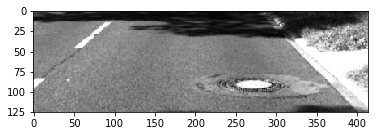

In [12]:
from scipy import misc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from pylab import imread, imshow, gray, mean
gray()



img=plt.imread('./ML_ANNOTATOR/Annotator/cropped/2011_09_26_drive_0096_sync_0185_c414w125h.png')
print(type(img))
print(img.shape)
#print(img)

def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]):
    """
    Transforms a colour image to a greyscale image by
    taking the mean of the RGB values, weighted
    by the matrix weights
    """
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    return np.sum(tile * im, axis=2)

imgGray = to_grayscale(img)

imgplot = plt.imshow(imgGray)
hist, bin_edges = np.histogram(imgGray.ravel(),range=(0.0,1.0))
print(type(hist))
print(len(hist))
print(hist)
print(type(bin_edges))
print(len(bin_edges))
print(bin_edges)
print("sum is")
print(hist.sum())

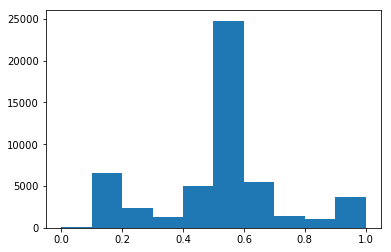

In [13]:
a=plt.hist(imgGray.ravel(),range=(0.0, 1.0))

## Create image histogram with 10 bins and store in csv file

In [4]:
arrHist=[]
for item in image_name:
    imName=""
    fileP='./ML_ANNOTATOR/Annotator/cropped/'
    imName=os.path.join(fileP,item)
    img=plt.imread(imName)
    imgGray = to_grayscale(img)
    hist, bin_edges = np.histogram(imgGray.ravel(),range=(0.0,1.0))
    arrHist.append(hist)

    
#print(arrHist)

# arrhist check this

print(type(arrHist))
result=zip(arrHist,score)
  
#another




#print(result)
with open('./ML_ANNOTATOR/HistScore.csv','w', newline='') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['Histogram1','Histogram2','Histogram3','Histogram4','Histogram5','Histogram6','Histogram7','Histogram8','Histogram9','Histogram10','Score'])
    for arr,score in result:
        arr_new = []
        for a in arr:
            arr_new.append(a)
        arr_new.append(score)
        csv_out.writerow(arr_new)
print("DONE")


<class 'list'>
DONE
